# Synthetic Data

In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

sampleNo = 10000;
mean = 0
sigma = 1
np.random.seed(0)
s = np.random.normal(mean, sigma, 6 )
#s=[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788]

In [2]:
A=np.array([[s[0],s[1]],[s[2],s[3]],[s[4],s[5]]])
print ("rank of A:",np.linalg.matrix_rank(A))

rank of A: 2


## Generation of Dataset #1

In [3]:
s1 = np.random.normal(mean,sigma,1000)
v=np.zeros((2,500))
for i in range(0,500):
    v[:,i]=[s1[i],s1[i+500]]
print (v.shape)

(2, 500)


## singular value and eigenvalue decomposition of dataset #1

In [4]:
X= np.dot(A,v)
print(X.shape)
print (np.linalg.matrix_rank(X))

(3, 500)
2


### 1. Compute the singular value decomposition of X and the eigenvalue decomposition of XXT 

In [5]:
U_X,Sigma_X,UT_X=np.linalg.svd(X)
print("Left singular vectors of X:\n",U_X,"\n")
print("singular values of X:\n" , Sigma_X)

Left singular vectors of X:
 [[-0.6282393   0.14423815 -0.76453302]
 [-0.60865006 -0.70321124  0.3674766 ]
 [-0.48462407  0.69619631  0.5295755 ]] 

singular values of X:
 [6.17389142e+01 5.24506223e+01 5.86070547e-15]


In [6]:
Sigma_XXT,V_XXT=np.linalg.eig(np.dot(X,X.T))
print("Eigenvectors vectors of XXT:\n",V_XXT)
print("Eigenvalues of XXT:\n",Sigma_XXT)

Eigenvectors vectors of XXT:
 [[-0.76453302  0.6282393   0.14423815]
 [ 0.3674766   0.60865006 -0.70321124]
 [ 0.5295755   0.48462407  0.69619631]]
Eigenvalues of XXT:
 [4.54747351e-13 3.81169352e+03 2.75106778e+03]


In [7]:
print (np.power(Sigma_X,2))

[3.81169352e+03 2.75106778e+03 3.43478686e-29]


we can find that the left singular vectors of $\mathbf{X}$ and the eigenvectors of $\mathbf{XX}^T$ are the same. 

In order to see the equivalence between the square of the singular values of $\mathbf{X}$ and the eigenvalues of $\mathbf{XX}^T$, we once again need to be aware of the descending versus ascending order for linalg.svd and linalg.eigh. The only discrepancy in this case is for the smallest singular/eigenvalue. However, that discrepancy is due to numerical issues; in reality, we should only have two nonzero singular/eigenvalues since the rank of $\mathbf{X}$ is 2. However, numerical algorithms almost never manage to return singular/eigenvalues that are exactly zero in such situations due to minute numerical roundoff errors in finite-precision systems.

In [8]:
print ("the sum of squares of the singular values of X: ",sum(np.power(Sigma_X,2)))

the sum of squares of the singular values of X:  6562.761306521781


In [9]:
print ("energy of X(the square of  Frobenius of X):", np.power(np.linalg.norm(X),2))

energy of X(the square of  Frobenius of X): 6562.761306521779


### 2.  why no zero in the singular values and the relationship between X and A

- because there exist some error in the calculation of the python. But they are really small so we can ignore those error

# PCA of Dataset #1

1. Answer: 2 pricipal components is enough. The rank of X is two, which means there are two linearly independent vectors. So tge whole points in the 3-D space are plot in a 2-D subspace. So we just need to find the 2-D space we can capture all the variation in the data. So the number of principal components is 2.

In [10]:
print (np.mean(X[:,1:3]))

-0.9573239585538819


- E[Xk] = -0.96, k =1,2,3

In [11]:
m = (np.sum(X,axis=1))/500
print (m)

[-0.09091839 -0.17682947 -0.00855293]


- the mean vector **m** from the data matrix __X__ is [-0.09091839 -0.17682947 -0.00855293]

In [12]:
index=np.argsort(Sigma_X)
print(index)
U = np.matrix(V_XXT.T[index[:2]])#get the top two principal components U
print (U)

[2 1 0]
[[ 0.14423815 -0.70321124  0.69619631]
 [ 0.6282393   0.60865006  0.48462407]]


In [13]:
final_X = U@X
final_X.shape

(2, 500)

In [14]:
new_X = X.copy()
recons_X = U.T@final_X
error = np.linalg.norm(recons_X - new_X)
error = np.power(error,2)
print (error)

3.2850919284328484e-28


In [15]:
X_tilde2=U_X[:,:1].T@X
X_hat2=U_X[:,:1]@X_tilde2
print(np.linalg.norm(X_hat2-X)**2)

2751.067783052586


In [16]:
Sigma_X[1]**2

2751.067783052585

In [17]:
from mpl_toolkits.mplot3d import Axes3D

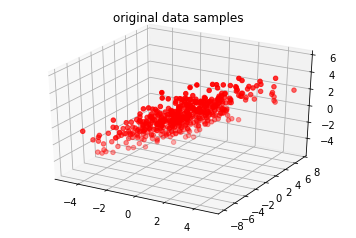

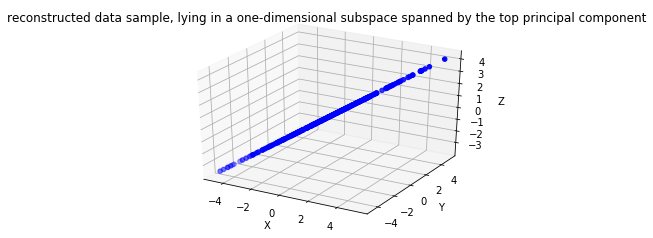

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X.T[:,0],X.T[:,1],X.T[:,2],c="r")
plt.title("original data samples")
plt.show()

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_hat2[0],X_hat2[1],X_hat2[2],c="b")
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("reconstructed data sample, lying in a one-dimensional subspace spanned by the top principal component")
plt.show()

## Generation of Dataset #2

In [19]:
s2 = np.random.normal(mean, sigma, 3 )

In [20]:
c=np.array([s2[0],s2[1],s[2]])
#c=[ 0.2390336 , -1.00033035, -0.04932407]

In [21]:
s1 = np.random.normal(mean,sigma,1000)
v=np.zeros((2,500))
for i in range(0,500):
    v[:,i]=[s1[i],s1[i+500]]
print (v.shape)

(2, 500)


In [22]:
X2 = np.dot(A,v)
for i in range(0,500):
    X2[:,i]+= c
print ("rank of x in #2:",np.linalg.matrix_rank(X2))

rank of x in #2: 3


In [23]:
U_X2, Sigma_X2, UT_X2=np.linalg.svd(X2)
print("Singular values of X in #2:",Sigma_X2)

Singular values of X in #2: [71.13643184 60.13611125  9.29555401]


In [24]:
Sigma_XXT2, V_XXT2=np.linalg.eig(np.dot(X2,X2.T))
print("eigen values of XXT in #2:",Sigma_XXT2)

eigen values of XXT in #2: [  86.40732436 3616.35187593 5060.39193483]


In [25]:
index = np.argsort(-Sigma_XXT2)
print (index)
U2 = np.matrix(V_XXT2.T[index[:2]])
print (U2)

[2 1 0]
[[ 0.09876089 -0.8546013   0.50980673]
 [ 0.65785846  0.44046132  0.61091412]]


In [26]:
UUT=np.dot(U2.T,U2)
final_X2=np.dot(UUT,X2)
error2 = np.linalg.norm(final_X2 - X2)
error2 = np.power(error2,2)
print ("the error without centering:",error2)

the error without centering: 86.40732436273571


In [27]:
mean_x2= np.mean(X2,axis=1)
print ("mean vector of x in #2:",mean_x2)

mean vector of x in #2: [ 0.58804272 -1.82059846  1.04872831]


In [28]:
mean_X2=final_X2.copy()
center_X2=X2-mean_X2
U_center,Sigma_center,V_center=np.linalg.svd(center_X2)
UUT_center=U_center*U_center.T
final_center_X2=np.dot(UUT_center,center_X2)+mean_X2
center_error2 = np.linalg.norm(final_center_X2 - X2)
center_error2 = np.power(center_error2,2)
print ("the error after centering:",center_error2)

the error after centering: 4.369453561328541e-30


- As you can see the new error is much smaller then the previous one, and it can consider as 0

Text(15,-4,'centered points')

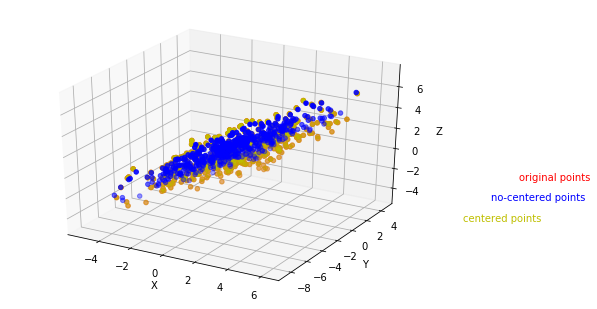

In [29]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X2[0],X2[1],X2[2],c="r")
ax.scatter(final_X2[0],final_X2[1],final_X2[2],c="b")
ax.scatter(final_center_X2[0],final_center_X2[1],final_center_X2[2],c="y")
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.text(15,4,0,"original points",color="r")
ax.text(15,0,0,"no-centered points",color="b")
ax.text(15,-4,0,"centered points",color="y")

## Generation of Dataset #3

In [30]:
s3 = np.random.normal(mean,sigma,1000)
v=np.zeros((2,500))
for i in range(0,500):
    v[:,i]=[s3[i],s3[i+500]]
X3=np.dot(A,v)
for i in range(0,500):
    n3=np.random.normal(mean,0.1,3)
    X3[0,i]+=n3[0]
    X3[1,i]+=n3[1]
    X3[2,i]+=n3[2]
print ("rank of x in #3:",np.linalg.matrix_rank(X3))

rank of x in #3: 3


In [31]:
trans_X3=X3.copy()
for i in range(0,500):
    trans_X3[:,i:i+1]=X3[:,i:i+1]/np.linalg.norm(X3[:,i:i+1])
print ("rank of the normalized data matrix X:",np.linalg.matrix_rank(trans_X3))

rank of the normalized data matrix X: 3


In [32]:
U_X3, Sigma_X3, UT_X3=np.linalg.svd(trans_X3)
print("Singular values of normalized data matrix X in #3:",Sigma_X3)

Singular values of normalized data matrix X in #3: [16.66922571 14.84233185  1.35723957]


Text(0.5,0,'X')

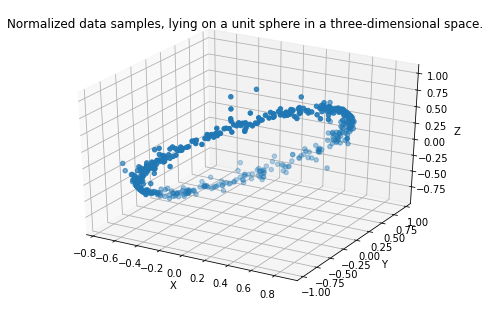

In [33]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(trans_X3[0],trans_X3[1],trans_X3[2])
plt.title("Normalized data samples, lying on a unit sphere in a three-dimensional space.")

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')

In [34]:
U_X3, Sigma_X3, UT_X3=np.linalg.svd(trans_X3)
print("Singular values of normalized X in #3:",Sigma_X3)
Sigma_XXT3, V_XXT3=np.linalg.eig(np.dot(trans_X3,trans_X3.T))
print("eigen values of normalized XXT in #3:",Sigma_XXT3)
index = np.argsort(-Sigma_XXT3)
print (index)
U3 = np.matrix(V_XXT3.T[index[:2]])
print (U3)

Singular values of normalized X in #3: [16.66922571 14.84233185  1.35723957]
eigen values of normalized XXT in #3: [  1.84209926 277.86308589 220.29481485]
[1 2 0]
[[ 0.63148977  0.59065917  0.50233695]
 [ 0.12715501 -0.71797143  0.68436002]]


In [35]:
UUT3=np.dot(U3.T,U3)
final_X3=np.dot(UUT3,trans_X3)
error3 = np.linalg.norm(final_X3 - trans_X3)
error3 = np.power(error3,2)


Text(0.5,0,'X')

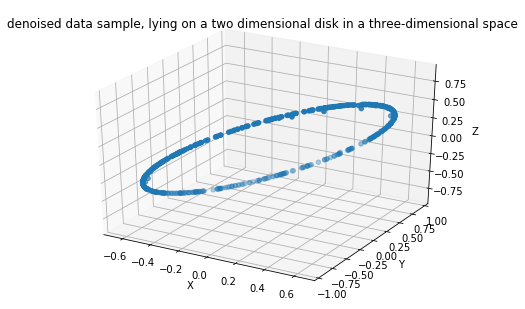

In [36]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(final_X3[0],final_X3[1],final_X3[2])
plt.title("denoised data sample, lying on a two dimensional disk in a three-dimensional space")
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')

In [37]:
print ("the square of the third singular value:",np.power(Sigma_X3[2],2))
print ("the error in #3:",error3)

the square of the third singular value: 1.84209925794093
the error in #3: 1.8420992579409312


# real data

In [38]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

In [39]:
images.shape

(178, 64)

In [40]:
a=images[0].reshape(8,8)
print (a)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


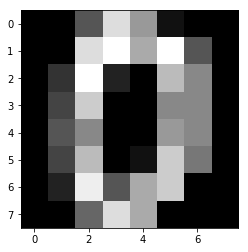

In [41]:
plt.imshow(a,cmap = "gray")

In [42]:
a_image=[]
for i in range (0,178):
    a_image.append(images[i].reshape(8,8))
arr=np.array(a_image)

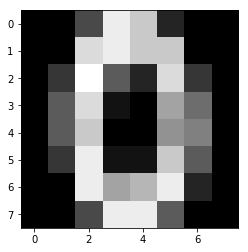

In [43]:
arr_mean=np.mean(arr,axis=0)

plt.imshow(arr_mean.astype(int),cmap="gray")

(178, 8, 8)


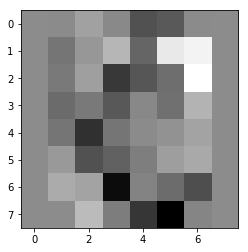

In [44]:
center_arr= arr.copy()
center_arr=arr-arr_mean
print (center_arr.shape)
plt.imshow(center_arr[0].real,cmap="gray")

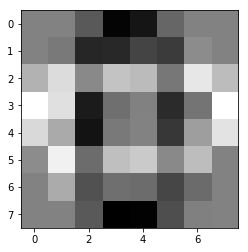

In [45]:
plt.imshow((np.array(images[0]).reshape(8,8).T-arr_mean).real,cmap="gray")

the sigma before substract the mean:


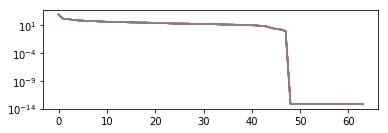

In [46]:
a,b,c =np.linalg.svd(images)
print("the sigma before substract the mean:")
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
for i in range(0,8):
    line, =ax.plot(b)
ax.set_yscale("log")

In [47]:
newarr = np.reshape(center_arr,(178,64))
newarr=newarr.T.copy()
aa,bb,cc = np.linalg.svd(newarr)
ee,ff=np.linalg.eig(np.dot(newarr.T,newarr))
#print (ee[0])
#print (np.power(bb[0],2))
print (sum(ee[:2])/np.power(np.linalg.norm(center_arr),2))

(0.39375821654303145+0j)


the sigma after centered


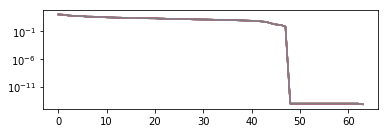

In [48]:
print("the sigma after centered")
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
for i in range(0,8):
    line, =ax.plot(bb)
ax.set_yscale("log")

In [49]:
Sigma_pow2 = np.power(bb,2)
for i in range(0,64):
    if (sum(Sigma_pow2[:i+1])/np.power(np.linalg.norm(center_arr),2)>0.90):
        print ("the smallest k component in this problem is:",i+1)
        break

the smallest k component in this problem is: 18


fist principal component of center mean X:


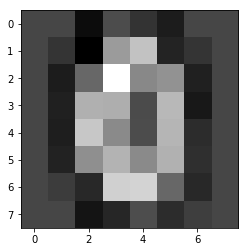

In [50]:
U_R=aa[:,0:18]
first_pr=np.reshape(U_R[:,0],(8,8))
print("fist principal component of center mean X:")
plt.imshow(first_pr,cmap="gray")

In [51]:
prin3=np.matrix(aa[:,0:3])
D3arr=np.dot(prin3.T,newarr)
print (D3arr.shape)

(3, 178)


3 dimentional feature vectors


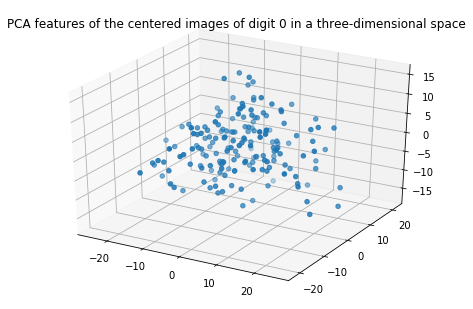

In [52]:
print("3 dimentional feature vectors")
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(D3arr[0,:],D3arr[1,:],D3arr[2,:])
plt.title("PCA features of the centered images of digit 0 in a three-dimensional space")
plt.show()

In [54]:
Final_R = np.dot(prin3,D3arr)

In [55]:
mean=np.mean(images,axis=0)
center_arr_R=images.copy()
center_arr_R-=mean
u,sigma,v=np.linalg.svd(center_arr_R)
#sigma,u=np.linalg.eig(np.dot(center_arr,center_arr.T))
#sigma,u=np.linalg.eig(np.cov(center_arr))
V=np.matrix(v[[0,1,2]])
UUT=np.dot(U.T,U)
trans_R=center_arr_R*V.T
recons_R = trans_R*V
final_R=recons_R.copy()
final_R += mean 
error1 = np.linalg.norm(final_R - images)
error= error1**2
print ("the error :",error)

the error : 36050.010605737116


In [56]:
aaa,bbb,ccc=np.linalg.svd(center_arr_R)
print("the square of the sum of 3-64 singular value:",sum(np.power(bbb[3:64],2)))

the square of the sum of 3-64 singular value: 36050.01060573712


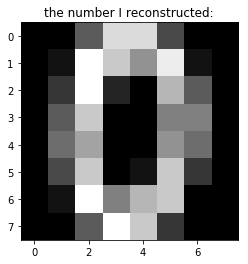

In [57]:
plt.title("the number I reconstructed:")
plt.imshow(final_R[0].reshape(8,8).astype("int"),cmap="gray")
plt.show()

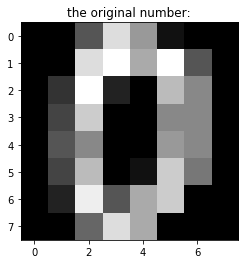

In [58]:
plt.title("the original number:")
plt.imshow(images[0].reshape(8,8),cmap = "gray")
plt.show()